Epoch 1/50
25/25 [==============================] - 2s 6ms/step - loss: 0.1148
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0226
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0055
Epoch 4/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0021
Epoch 5/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 6/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 8/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 9/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 10/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 11/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 12/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 13/50
25/25 [=============================

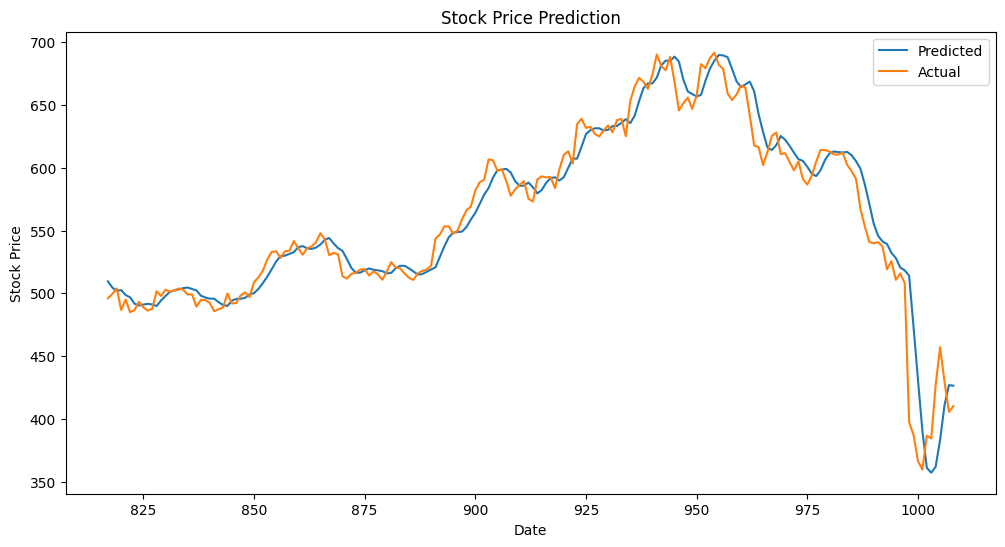

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load your dataset (replace 'your_dataset.csv' with your dataset file)
data = pd.read_csv("/content/NFLX.csv")

# Choose the column to predict (e.g., 'Close' for stock closing prices)
data = data[['Close']]

# Normalize the data to a range between 0 and 1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Create sequences and labels for training and testing
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        label = data[i+sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 10  # You can adjust this sequence length
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions on the test data
predicted_stock_prices = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)

# Plot the predicted vs. actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size+sequence_length:], predicted_stock_prices, label='Predicted')
plt.plot(data.index[train_size+sequence_length:], scaler.inverse_transform(y_test), label='Actual')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.show()